Sentiment Analysis on Scrapped News


Device set to use cpu


Headline: Passenger plane crashes and flips at airport in Canada
Sentiment: {'label': 'NEGATIVE', 'score': 0.9976385831832886}
--------------------------------------------------------------------------------
Headline: Gyanesh Kumar appointed new Chief Election Commissioner
Sentiment: {'label': 'POSITIVE', 'score': 0.9980636239051819}
--------------------------------------------------------------------------------
Headline: Indian Embassy in Nepal reacts to Nepali student's death by suicide at Odisha university
Sentiment: {'label': 'NEGATIVE', 'score': 0.9920496344566345}
--------------------------------------------------------------------------------
Headline: Congress distances itself from Sam Pitroda's 'Don't assume China as enemy' remark
Sentiment: {'label': 'NEGATIVE', 'score': 0.9953147172927856}
--------------------------------------------------------------------------------
Headline: Cameron Green gets engaged to longtime girlfriend Emily Redwood
Sentiment: {'label': 'POSITIVE',

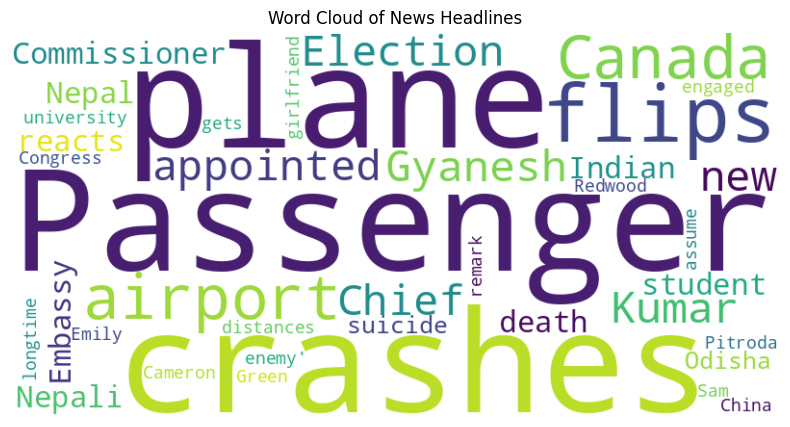

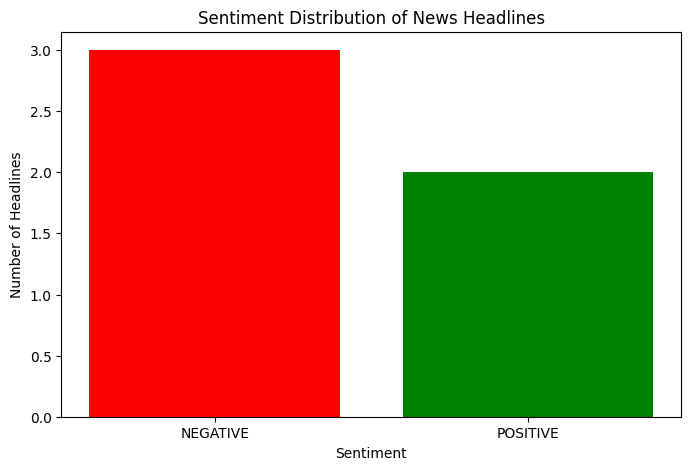

In [ ]:
import requests
from bs4 import BeautifulSoup
from transformers import pipeline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

def fetch_news_headlines(url):
    """
    Scrape news headlines from the provided URL.
    This example uses Inshorts, where headlines are contained in <span> tags with itemprop="headline".
    Adjust the selector as needed for your target site.
    """
    headers = {'User-Agent': 'Mozilla/5.0'}
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        print("Error fetching news, status code:", response.status_code)
        return []

    soup = BeautifulSoup(response.content, 'html.parser')
    # For Inshorts, headlines are in <span> tags with attribute itemprop="headline"
    headline_elements = soup.find_all("span", {"itemprop": "headline"})
    headlines = [element.get_text(strip=True) for element in headline_elements]
    return headlines

def analyze_sentiments(headlines):
    """
    Analyze the sentiment of each headline using Hugging Face's transformer pipeline.
    The model used here is "distilbert-base-uncased-finetuned-sst-2-english".
    """
    sentiment_pipeline = pipeline("sentiment-analysis",
                                  model="distilbert-base-uncased-finetuned-sst-2-english")
    sentiments = sentiment_pipeline(headlines)
    return sentiments

def generate_word_cloud(text_list):
    """
    Generate and display a word cloud from the list of news headlines.
    """
    text = " ".join(text_list)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud of News Headlines")
    plt.show()

def plot_sentiment_distribution(sentiments):
    """
    Create a bar chart that shows the frequency of each sentiment label.
    """
    # Extract sentiment labels from the results
    labels = [result['label'] for result in sentiments]
    sentiment_counts = Counter(labels)

    # Prepare data for plotting
    labels_list, counts = zip(*sentiment_counts.items())

    # Color bars based on sentiment (green for positive, red for negative)
    colors = ['green' if label.upper() == 'POSITIVE' else 'red' for label in labels_list]

    plt.figure(figsize=(8, 5))
    plt.bar(labels_list, counts, color=colors)
    plt.xlabel("Sentiment")
    plt.ylabel("Number of Headlines")
    plt.title("Sentiment Distribution of News Headlines")
    plt.show()

def main():
    # URL for Inshorts news headlines (ensure scraping is permitted for educational use)
    url = "https://inshorts.com/en/read"
    headlines = fetch_news_headlines(url)

    if not headlines:
        print("No headlines found. Please check the URL or HTML selectors.")
        return

    sentiments = analyze_sentiments(headlines)

    # Print each headline with its corresponding sentiment result
    for headline, sentiment in zip(headlines, sentiments):
        print("Headline:", headline)
        print("Sentiment:", sentiment)
        print("-" * 80)

    # Visualization 1: Word Cloud of headlines
    generate_word_cloud(headlines)

    # Visualization 2: Bar chart of sentiment distribution
    plot_sentiment_distribution(sentiments)

if __name__ == "__main__":
    main()

Fetching all - Page 1...
Fetching all - Page 2...
Fetching all - Page 3...
Fetching technology - Page 1...
Fetching technology - Page 2...
Fetching technology - Page 3...
Fetching sports - Page 1...
Fetching sports - Page 2...
Fetching sports - Page 3...
Fetching entertainment - Page 1...
Fetching entertainment - Page 2...
Fetching entertainment - Page 3...
Fetching business - Page 1...
Fetching business - Page 2...
Fetching business - Page 3...


Device set to use cpu


Headline: The Beautiful Craft of Chandi Tarakasi
Sentiment: {'label': 'POSITIVE', 'score': 0.9998045563697815}
--------------------------------------------------------------------------------
Headline: When "The Beatles" visited India in 1968
Sentiment: {'label': 'POSITIVE', 'score': 0.9922457337379456}
--------------------------------------------------------------------------------
Headline: Sajan Prakash and Karnataka teams break National Games records
Sentiment: {'label': 'POSITIVE', 'score': 0.9995662569999695}
--------------------------------------------------------------------------------
Headline: All about the Carpet Weaving technique of Sikkim
Sentiment: {'label': 'POSITIVE', 'score': 0.9944156408309937}
--------------------------------------------------------------------------------
Headline: Kishore Kumar Jena opens up on challenging period
Sentiment: {'label': 'POSITIVE', 'score': 0.9995786547660828}
--------------------------------------------------------------------------

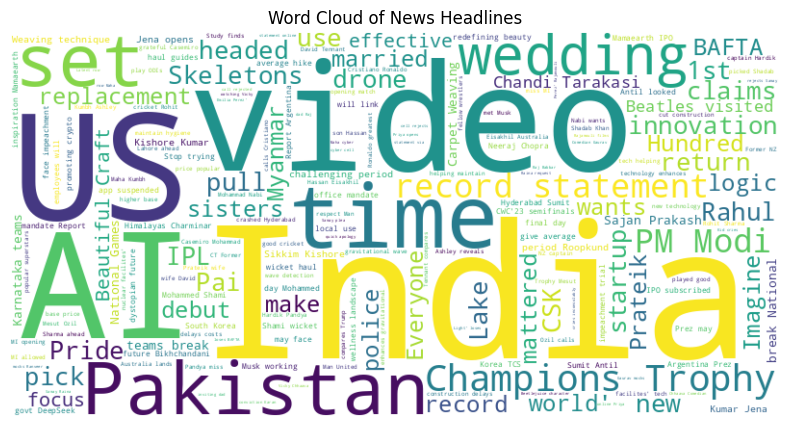

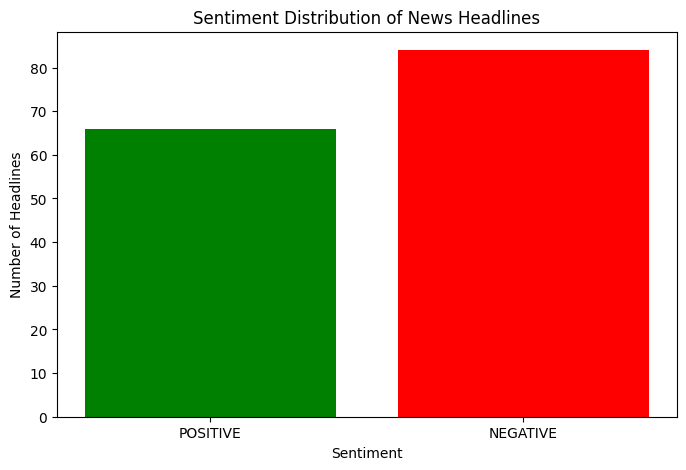

In [ ]:
import requests
from bs4 import BeautifulSoup
from transformers import pipeline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import time  # To add delays between requests

def fetch_news_headlines():
    """
    Fetch multiple pages of Inshorts news headlines.
    """
    base_url = "https://inshorts.com/en/read"
    headlines = []
    categories = ["all", "technology", "sports", "entertainment", "business"]  # Change categories if needed

    for category in categories:
        page = 1
        while page <= 3:  # Fetch 3 pages per category
            print(f"Fetching {category} - Page {page}...")
            url = f"https://inshorts.com/en/read/{category}"
            headers = {'User-Agent': 'Mozilla/5.0'}
            response = requests.get(url, headers=headers)

            if response.status_code != 200:
                print("Error fetching news, status code:", response.status_code)
                break  # Stop if there's an issue

            soup = BeautifulSoup(response.content, 'html.parser')
            headline_elements = soup.find_all("span", {"itemprop": "headline"})
            new_headlines = [element.get_text(strip=True) for element in headline_elements]

            if not new_headlines:
                break  # Stop if no new headlines found (pagination limit reached)

            headlines.extend(new_headlines)
            page += 1
            time.sleep(2)  # Avoid rate-limiting

    return headlines

def analyze_sentiments(headlines):
    """
    Analyze the sentiment of each headline using Hugging Face's transformer pipeline.
    """
    sentiment_pipeline = pipeline("sentiment-analysis",
                                  model="distilbert-base-uncased-finetuned-sst-2-english")
    sentiments = sentiment_pipeline(headlines)
    return sentiments

def generate_word_cloud(text_list):
    """
    Generate and display a word cloud from the list of news headlines.
    """
    text = " ".join(text_list)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud of News Headlines")
    plt.show()

def plot_sentiment_distribution(sentiments):
    """
    Create a bar chart that shows the frequency of each sentiment label.
    """
    labels = [result['label'] for result in sentiments]
    sentiment_counts = Counter(labels)

    labels_list, counts = zip(*sentiment_counts.items())
    colors = ['green' if label.upper() == 'POSITIVE' else 'red' for label in labels_list]

    plt.figure(figsize=(8, 5))
    plt.bar(labels_list, counts, color=colors)
    plt.xlabel("Sentiment")
    plt.ylabel("Number of Headlines")
    plt.title("Sentiment Distribution of News Headlines")
    plt.show()

def main():
    headlines = fetch_news_headlines()

    if not headlines:
        print("No headlines found. Please check the URL or HTML selectors.")
        return

    sentiments = analyze_sentiments(headlines)

    # Print each headline with its corresponding sentiment result
    for headline, sentiment in zip(headlines, sentiments):
        print("Headline:", headline)
        print("Sentiment:", sentiment)
        print("-" * 80)

    # Visualization
    generate_word_cloud(headlines)
    plot_sentiment_distribution(sentiments)

if __name__ == "__main__":
    main()
